In [1]:
import numpy as np  
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.stats import norm
from scipy.integrate import simpson

In [2]:
# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }
CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.2

NOISE = 0.2
N_SAMPLE = 1024

<Figure size 1500x500 with 0 Axes>

In [8]:
iris_features = ['sepal length',
                 'sepal width',
                 'petal lenght',
                 'petal width', 'target'] 

iris_df = pd.read_csv('iris.csv',skiprows=1,sep=',',header=None,names=iris_features)
iris_df.head()

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
features_df = iris_df.drop('target',axis=1)
labels = iris_df.target

In [23]:
feature_df.head()

,sepal length,sepal width,petal lenght,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
target_name = ['setosa','versicolor','virginica']

In [25]:
iris_df[iris_df['target'] == 0]

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


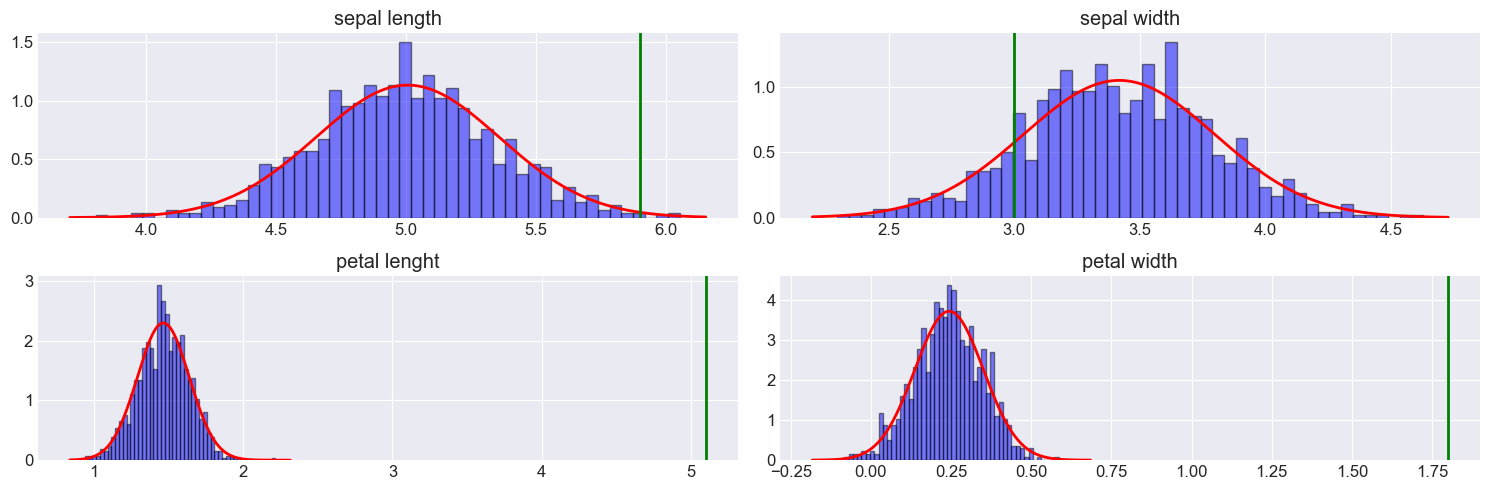

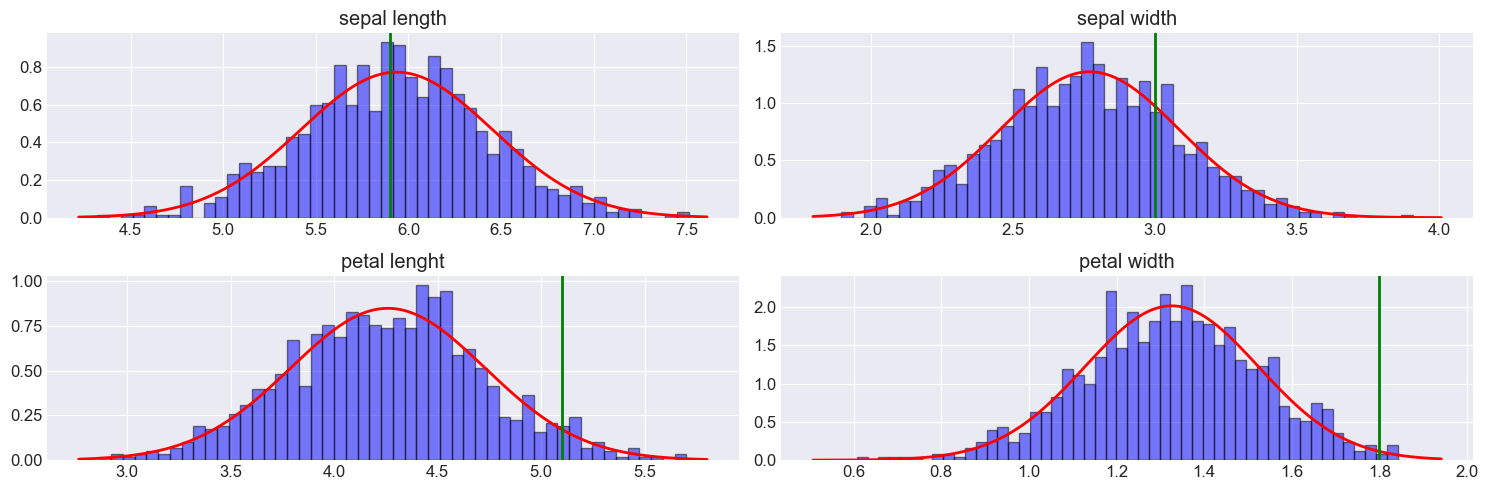

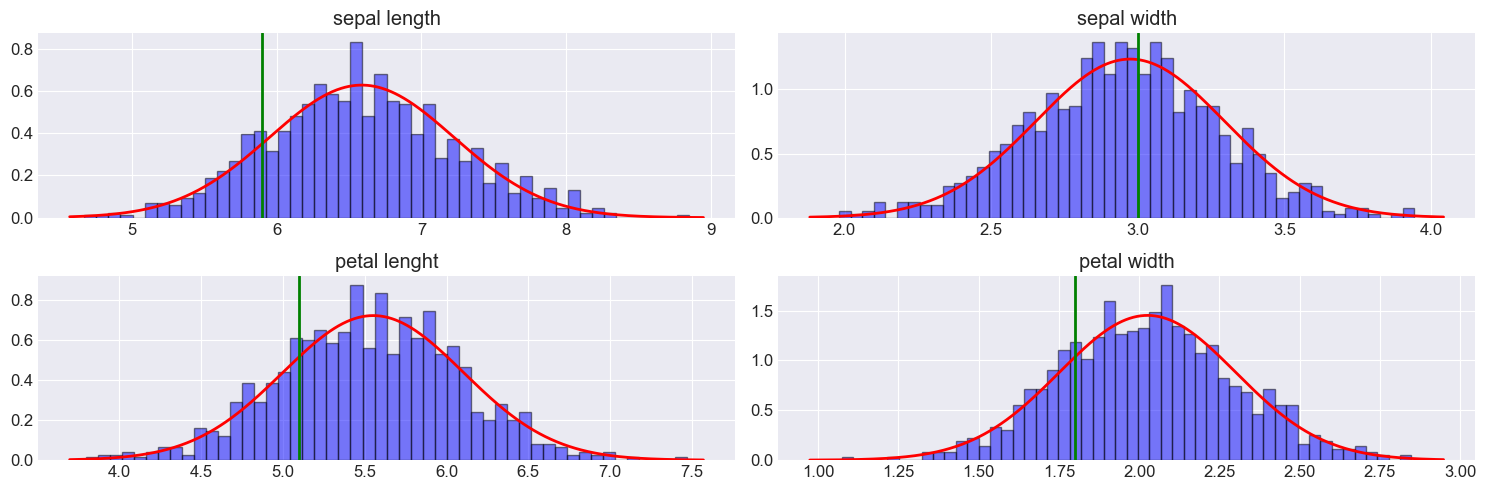

In [26]:
mu , std_dev = {},{}

for lbl in labels.unique(): # iterate over all the labels
    tmp_df = iris_df[iris_df['target'] == lbl] # collect rows for a specific label

    tmp_df =tmp_df.drop('target', axis = 1) # remove targets

    nSamples = N_SAMPLE

    fig, axes = plt.subplots(2,2)
    axes = axes.ravel() # single dimension
    
    pdf_col = {}
    
    for count, col in enumerate(tmp_df.columns): # iterate over all columns / Features

        mu[col] = tmp_df[col].mean() # calculate mean 
        std_dev[col] = tmp_df[col].std() # calculate std dev
        ax = axes[count]
        data = np.random.normal(mu[col], std_dev[col],  nSamples)
        ax.hist(data, bins = 50, density=True, alpha = 0.5, color ='b', edgecolor='k')
        ax.set_title(col)
        x= np.linspace(data.min()-0.1, data.max() +0.1, nSamples)
        pdf= norm.pdf(x, mu[col], std_dev[col])
        ax.plot(x, pdf, 'r-', lw =2)

        val = features_df.iloc[-1][col]

        pdf_val = norm.pdf(val, mu[col], std_dev[col])
        pdf_col[col] = pdf_val

        ax.axvline(x = val, color = 'g', linewidth = 2)

    plt.tight_layout()

In [28]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(feature_df,labels)

y_pred = clf.predict(feature_df)


In [30]:
# Let's use first two columns of the data and plot the data to visualize the results
xplot = iris_df.keys()[0]

yplot = iris_df.keys()[1]


# also locate instances which are incorrectly predicted.
x_err = iris_df[xplot][(labels != y_pred)]

y_err = iris_df[yplot][(labels != y_pred)]

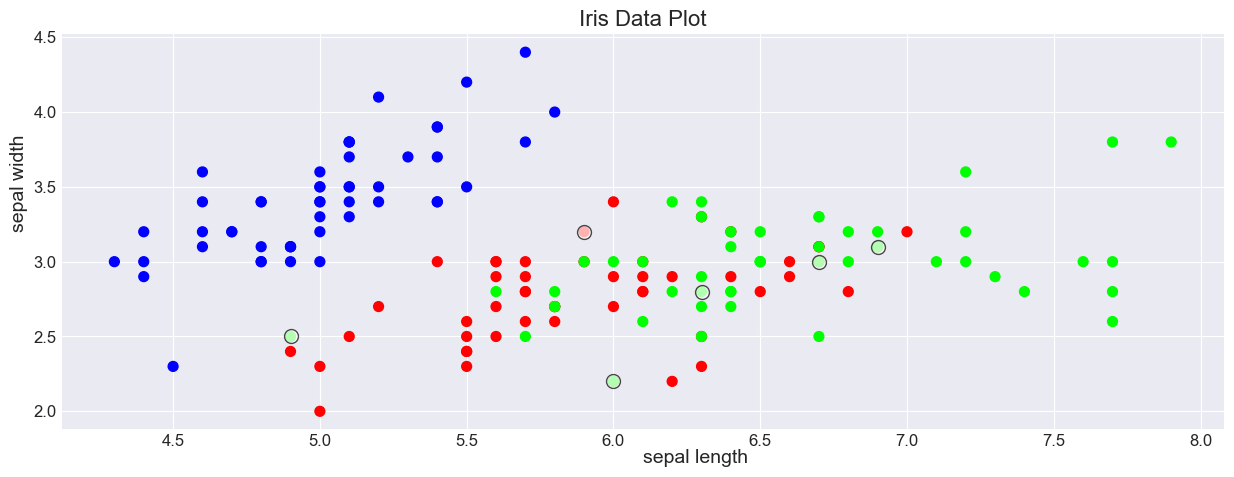

In [31]:
# Plot the data points

# Create a figure of given size
fig = plt.figure()

# Add a subplot
ax = fig.add_subplot(111)

# Set title
title = 'Iris Data Plot'

plt.scatter( iris_df[xplot], iris_df[yplot], s = 50, 
            c = iris_df['target'], 
            cmap=plt.cm.brg)  

plt.scatter(x_err, y_err, color = "w", label="mismatch", 
            s = 100, alpha = 0.7, edgecolor = 'black')

# Grid lines inside plot can be set as True or False
ax.grid(True)

# Plot frame can be set as true or false
ax.set_frame_on(True)

 
# Customize title, set position, allow space on top of plot for title
ax.set_title(title, fontsize=16, ha='center')

plt.subplots_adjust(top=0.9)

ax.title.set_position((0.5,1))

# Set x axis label
ax.xaxis.set_label_position('bottom')

ax.set_xlabel(xplot, fontsize=14,  ha='left') 

ax.xaxis.set_label_coords(0.5, -0.05)

# Set y axis label
ax.set_ylabel(yplot, fontsize=14,  ha='left');

#plt.show()

In [32]:
accuracy_score(labels,y_pred)

0.96

In [36]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha = 0.1)

clf.fit(feature_df,labels)
y_pred = clf.predict(feature_df)

accuracy_score(labels,y_pred)

0.9533333333333334

In [39]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

clf.fit(feature_df,labels)
y_pred = clf.predict(feature_df)

accuracy_score(labels,y_pred)

0.3333333333333333

In [40]:
X, y = datasets.make_moons(n_samples=N_SAMPLE, noise= NOISE,
                           random_state=RANDOM_STATE, shuffle=True)

X.shape, y.shape

((1024, 2), (1024,))

In [41]:
np.unique(y)

array([0, 1], dtype=int64)

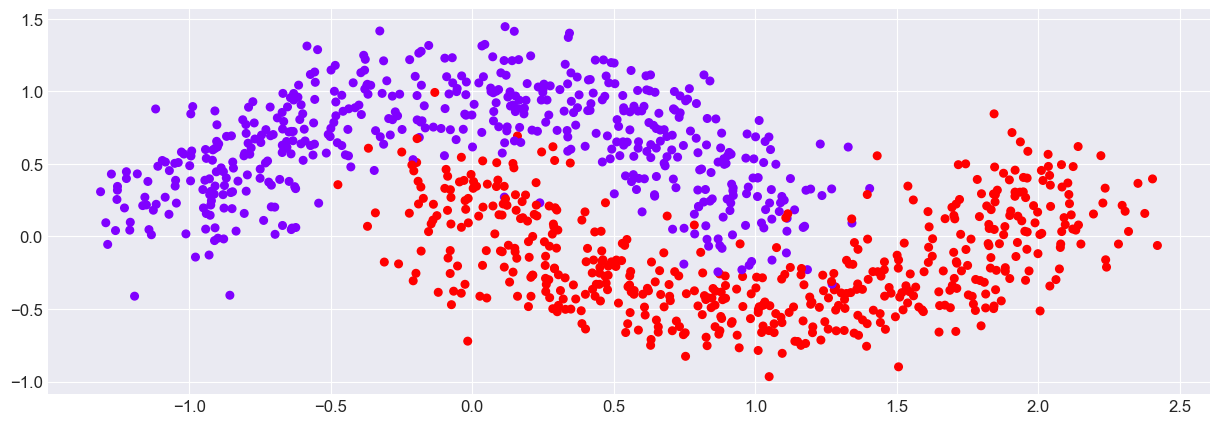

In [43]:
plt.scatter(X[:,0],X[:,1],s=30,c=y,cmap=CMAP);

In [44]:
clf = BernoulliNB()


clf.fit(X, y)

y_pred = clf.predict(X)

accuracy_score(y, y_pred)

0.8076171875

In [45]:
data_df = pd.DataFrame(X)
data_df['target'] = y
data_df

,0,1,target
0,0.530338,-0.048520,1
1,-0.260203,-0.189707,1
2,-0.850690,0.692485,0
3,1.030323,0.058221,0
4,0.975399,0.339541,0
...,...,...,...
1019,-0.909104,0.864281,0
1020,-0.346146,0.454048,0
1021,0.818756,1.112453,0
1022,1.526385,-0.046363,1
